In [1]:
%matplotlib inline
import sys
import os
working_dir_path = os.getcwd()
genomagic_qa_repo_path = '/'.join(working_dir_path.split('/')[:-1])
sys.path.append(genomagic_qa_repo_path)
import redshift.redshift_queries as rs
host='rndlab-genomagic-redshift.cl6ox83ermwm.us-east-1.redshift.amazonaws.com'
data_version = 'public_soy_v2_03'

In [2]:
chromosome=1
position=14000000
threshold=0.85
df = rs.get_similarities_in_position(host, data_version, chromosome, position, threshold)

with similar_samples as (select sample1, sample2 from public_soy_v2_03_haplotypes_similarity_view where similarity_score>=0.85 and chromosome_id=1 and start_position <= 14000000 and end_position >= 14000000), wgs_samples as (select sample_id from public_soy_v2_03_samples_view where analysis_method='applied_reference_genome' or analysis_method='whole_genome_sequencing'), temp_var1 as (select sample1, sample2 from similar_samples inner join wgs_samples on sample1=sample_id), temp_var2 as (select sample1,sample2 from temp_var1 inner join wgs_samples on sample2=sample_id) select * from temp_var2;


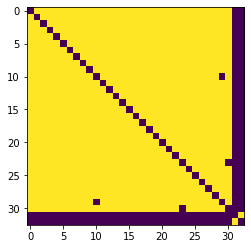

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_edges_matrix(samples_list, edges_dataframe):
    samples_num = len(samples_list)
    edges_mat = np.full((samples_num,samples_num), False, dtype=bool)
    for index, row in edges_dataframe.iterrows():
        v1 = np.where(samples_list==row['sample1'])
        v2 = np.where(samples_list==row['sample2'])
        assert len(v1) == 1
        assert len(v2) == 1
        ind1 = v1[0][0]
        ind2 = v2[0][0]
        edges_mat[ind1,ind2] = True
        edges_mat[ind2,ind1] = True
    return edges_mat

my_samples = pd.unique(pd.concat([df['sample1'], df['sample2']]))
samples_num = len(my_samples)
edges_mat = get_edges_matrix(my_samples, df)
#print(edges_mat)
plt.imshow(edges_mat)
plt.show()







    


    




    





In [ ]:

my_samples = pd.unique(pd.concat([df['sample1'], df['sample2']]))
samples_num = len(my_samples)
edges_mat = np.full((samples_num,samples_num), False, dtype=bool)
for index, row in df.iterrows():
    v1 = np.where(my_samples==row['sample1'])
    v2 = np.where(my_samples==row['sample2'])
    assert len(v1) == 1
    assert len(v2) == 1
    ind1 = v1[0][0]
    ind2 = v2[0][0]
    edges_mat[ind1,ind2] = True
    edges_mat[ind2,ind1] = True
print()
edges_mat = np.zeros()
group = np.zeros(samples_num)
next_color = 1
for index, row in df.iterrows():
    v1 = np.where(my_samples==row['sample1'])
    v2 = np.where(my_samples==row['sample2'])
    assert len(v1) == 1
    assert len(v2) == 1
    ind1 = v1[0][0]
    ind2 = v2[0][0]
    g1 = group[ind1]
    g2 = group[ind2]
    #print(ind1)
    #print(ind2)
    if g1 == 0 and g2 == 0:
        group[ind1] = next_color
        group[ind2] = next_color
        next_color += 1
    elif g1 == 0 and g2 > 0:
        group[ind1] = g2
    elif g1 > 0 and g2 == 0:
        group[ind2] = g1
    else:

In [ ]:
edges_mat = np.zeros()
group = np.zeros(samples_num)
next_color = 1
for index, row in df.iterrows():
    v1 = np.where(my_samples==row['sample1'])
    v2 = np.where(my_samples==row['sample2'])
    assert len(v1) == 1
    assert len(v2) == 1
    ind1 = v1[0][0]
    ind2 = v2[0][0]
    g1 = group[ind1]
    g2 = group[ind2]
    #print(ind1)
    #print(ind2)
    if g1 == 0 and g2 == 0:
        group[ind1] = next_color
        group[ind2] = next_color
        next_color += 1
    elif g1 == 0 and g2 > 0:
        group[ind1] = g2
    elif g1 > 0 and g2 == 0:
        group[ind2] = g1
    else:
        group[np.where(group==g2)]=g1
print(group)
        
